In [1]:
#-------------------------------------------------Customer Churn------------------------------------------------------------


#Current Solution :-
    
    #Sending discount offers to all customers.
    
    #Manualy analysis the customer suggestion and complaints.
    
    #if the Customer doesn't purschased and inactivity for 90 days.
    
    #no automated system to find churn customers.
    
    #High marketing costs due to untargeted discount offers

    
#Proposed Solution :-
    
    #using machine learning models to indentify churn patterns.
    
    #to find the churn customers and take action imediatly prvent churn customer.
    
    #you can offer the discount for targeted churn customers.
    
    #customer retention.

    
#Benifits :-
    
    #Improve revenue
    
    #Improve rating
    
    #reduce churn customers
    
    #save marketing cost
    
    #retain more customers
    

#Dataset :-

    #unwanted data is avilable (customerid, total_spend, usage_frequency, last_interaction, age).
    
    #This data is more then enough, but feedback scores,complaints will improve the model prediction.
    
    #This business problem we will use classification algorithms.

    
#Eda :-

    #Uni variate analysis.
    
    #Bi variate analysis.
    
    #Multivariate analysis.
    

#Data Preprocessing :-

    #Handle missing values. (Fillna(),FFill(),BFill(), Interpolation, Dropna())
    
    #indentify the outliers and remove. (IQR, Zscore, boxplot, scatterplot)
    
    #Remove duplicates if needed. (Duplicated(),Drop_Duplictes())
    
    #transformations (Log(), sqrt(), cube, Exponential).
    
    #feture Scalling (Binarizer, Min_max_Scaller, Standardization, Normalization, Robust Scaling).
    
    #Blance classes if needed. (Smote)
    
    #Encoding Categorical values. (norminal for One-hot-encoding, ordinal for label-encoding).

    
#Feature Selection :-
    
    #remove high correlated feature's.(corr())

    #Select the Feature values and target value manualy for model train.
    
    
#Algorithm Selection :-
    
    #Train test split to split the 80% of data to train the model and 20% data will be tested.
    
    #train with all classification algorithms and find the best algorithm for this business problem.
    
    #Finally choose the best algorithm with tunning and check with best accuracy score (precision, recall, f1_score).

In [2]:
#-------------------------------------------Import necessary libraries-----------------------------------------------------


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv("C:/Users/91801/Desktot/Projects/Churn Customer/dataset/Customer_Churn.csv")
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [4]:
#Change the columns lower case
df.columns = df.columns.str.lower()

In [5]:
#add underscore for spaced columns
df.columns = df.columns.str.replace(" ","_",1)

In [6]:
#descritive Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customerid         64374 non-null  int64 
 1   age                64374 non-null  int64 
 2   gender             64374 non-null  object
 3   tenure             64374 non-null  int64 
 4   usage_frequency    64374 non-null  int64 
 5   support_calls      64374 non-null  int64 
 6   payment_delay      64374 non-null  int64 
 7   subscription_type  64374 non-null  object
 8   contract_length    64374 non-null  object
 9   total_spend        64374 non-null  int64 
 10  last_interaction   64374 non-null  int64 
 11  churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
df.describe()

,customerid,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [8]:
df.describe(include="object")

,gender,subscription_type,contract_length
count,64374,64374,64374
unique,2,3,3
top,Female,Standard,Monthly
freq,34353,21502,22130


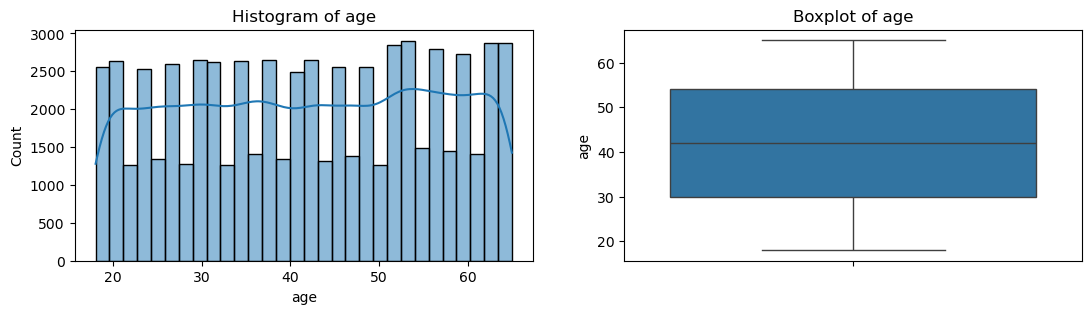

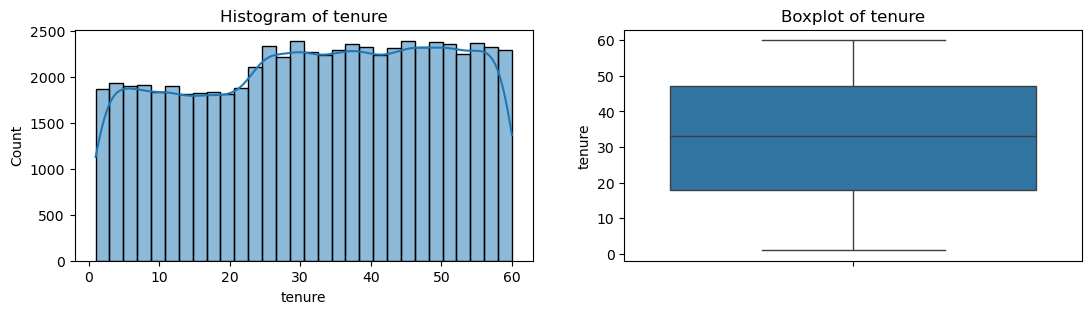

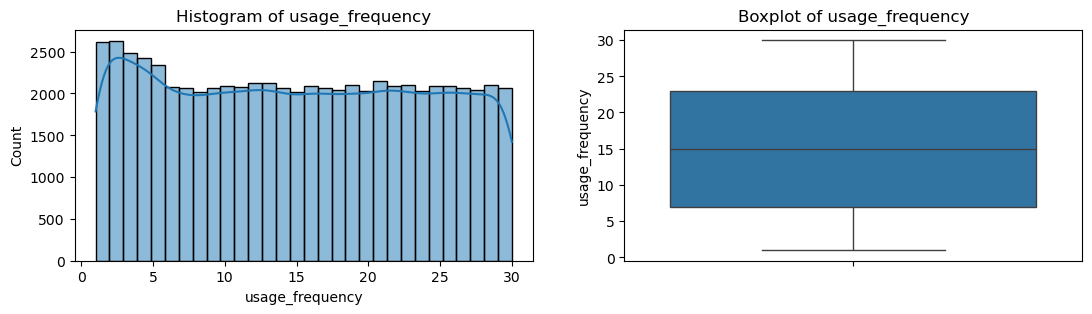

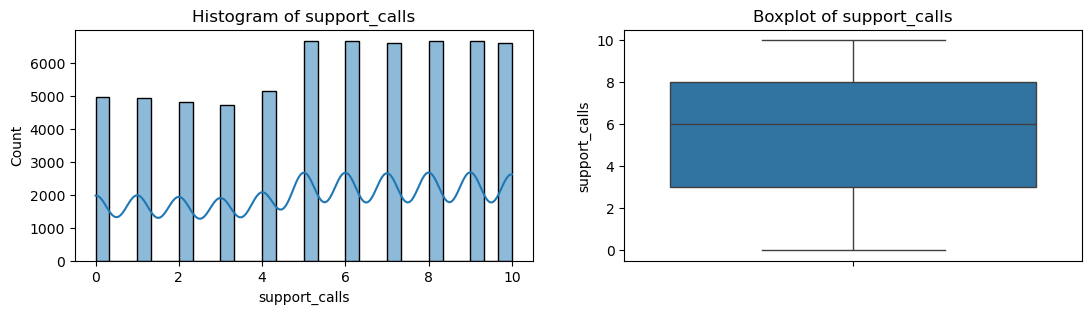

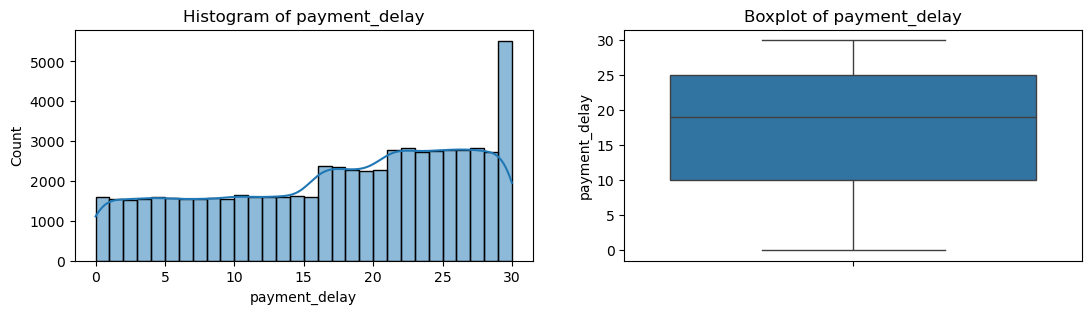

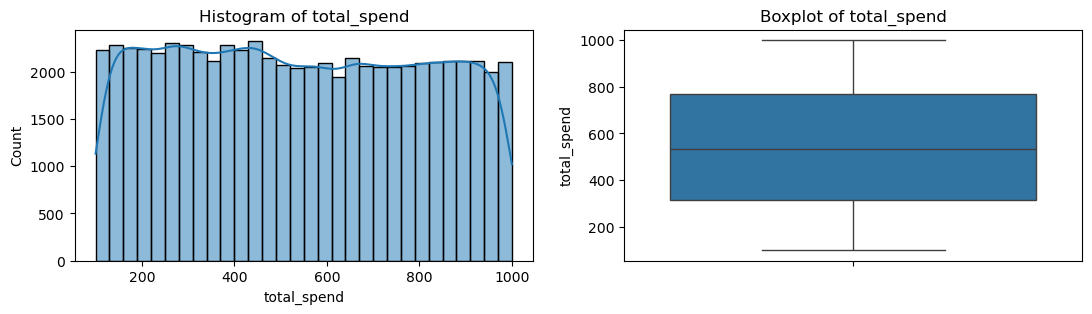

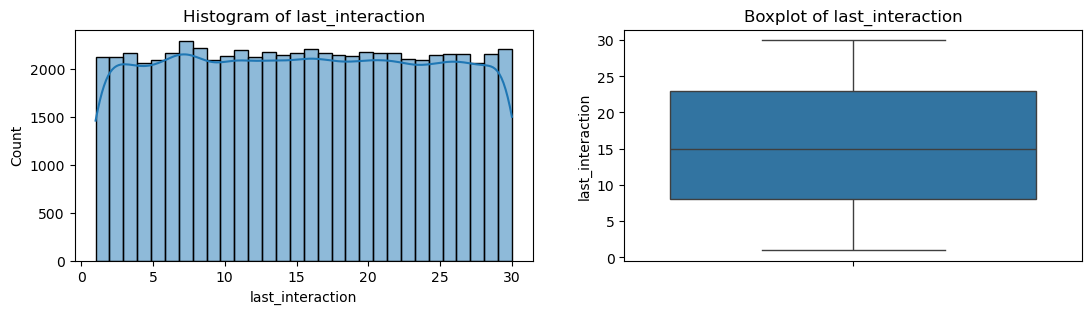

In [9]:
#----------------------------------------------EDA (Exploratory Data analysis)------------------------------------------------

num_features = df[["age", "tenure", "usage_frequency", "support_calls", "payment_delay", "total_spend", "last_interaction"]]

for col in num_features:
    plt.figure(figsize=(13, 3))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

[Text(0.5, 1.0, 'Gender')]

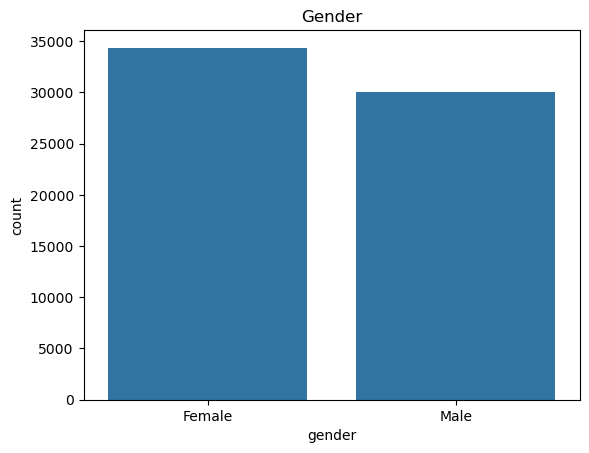

In [10]:
sns.countplot(data=df, x="gender").set(title="Gender")

[Text(0.5, 1.0, 'subcription type')]

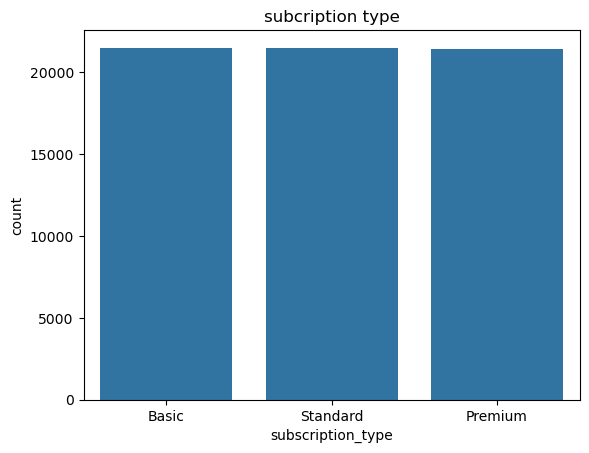

In [11]:
sns.countplot(data=df, x="subscription_type").set(title="subcription type")

[Text(0.5, 1.0, 'contract length')]

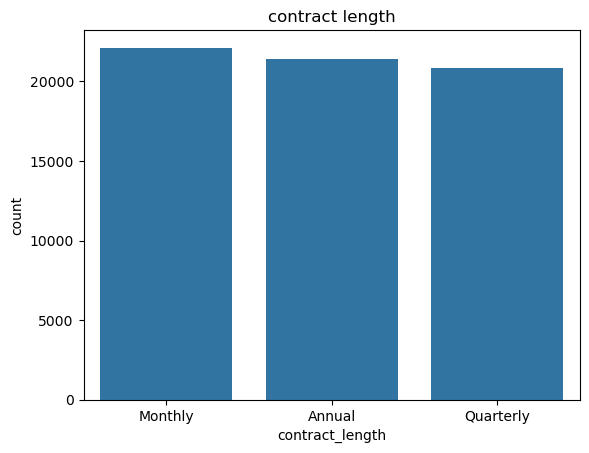

In [12]:
sns.countplot(data=df, x="contract_length").set(title="contract length")

[Text(0.5, 1.0, 'Most churn gender')]

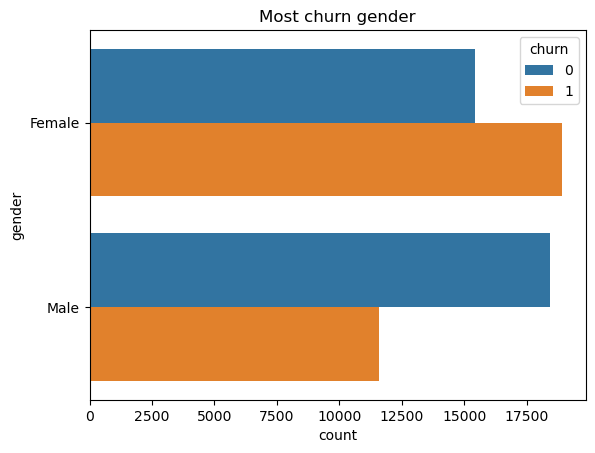

In [13]:
#Bivariate analysis

sns.countplot(data=df, y="gender",hue="churn").set(title="Most churn gender")

[Text(0.5, 1.0, 'subscription type with churn')]

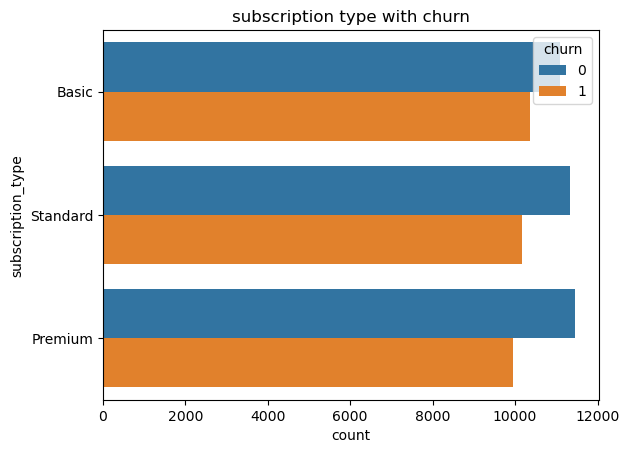

In [14]:
sns.countplot(data=df, y="subscription_type",hue="churn").set(title="subscription type with churn")

[Text(0.5, 1.0, 'contract length with churn')]

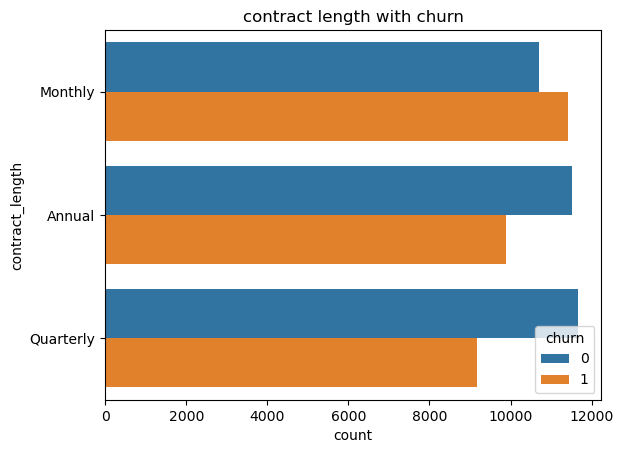

In [15]:
sns.countplot(data=df, y="contract_length", hue="churn").set(title="contract length with churn")

<AxesSubplot:xlabel='usage_frequency', ylabel='Count'>

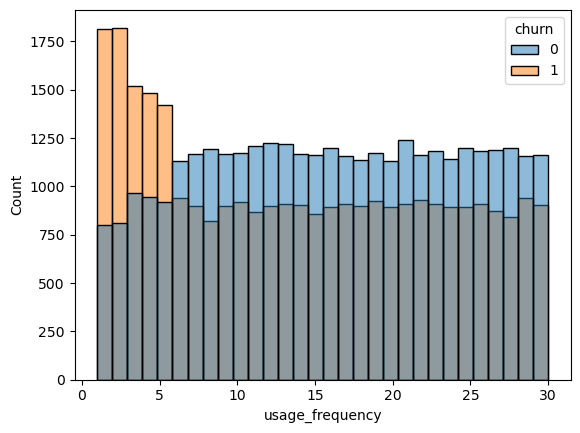

In [16]:
sns.histplot(data=df, x="usage_frequency", hue="churn",bins=30)

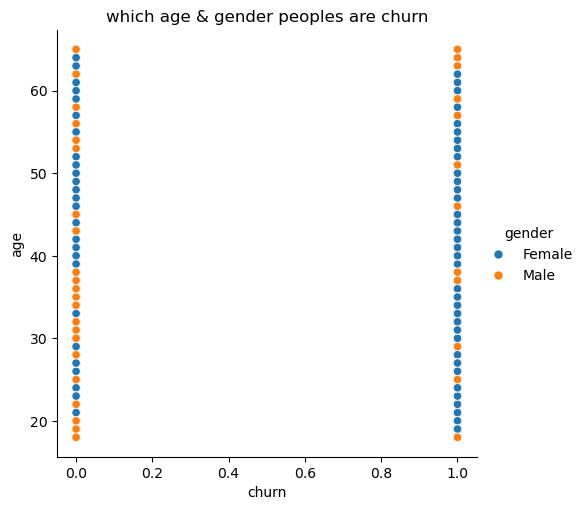

In [17]:
sns.relplot(data=df,x="churn",y="age",hue="gender").set(title="which age & gender peoples are churn")

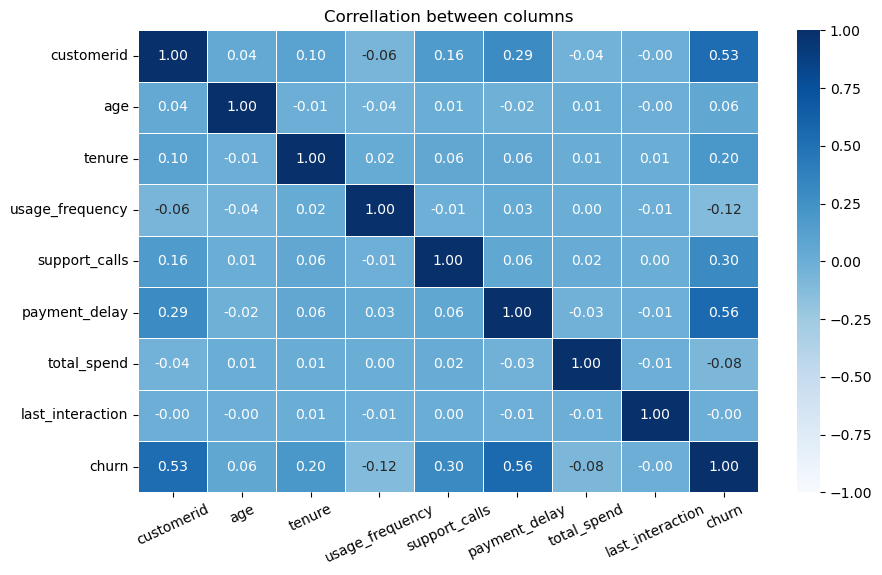

In [18]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f",vmin=-1, vmax=1, linewidths=0.5, linecolor="white") #YlGnBu,coolwarm,Blues
plt.xticks(rotation=25)
plt.title("Correllation between columns")
plt.show()

In [19]:
#Label Encoding

LE = LabelEncoder()
df['gender'] = LE.fit_transform(df['gender'])

df["contract_length"] = df["contract_length"].map({"Annual": 3, "Quarterly": 2, "Monthly": 1})

In [20]:
#select the Feature and Target

x = df[["age", "tenure","support_calls", "payment_delay", "contract_length"]]
y = df["churn"]

In [21]:
#train test split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [22]:
#Train, predict and check the store the metrics score

algorithm = {
    "LogisticRegression"     : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth=4),
    "RandomForestClassifier" : RandomForestClassifier(max_depth=3),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "XGBClassifier" : XGBClassifier(max_depth=3),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=15),
    "GaussianNB" : GaussianNB()
#     "SVC" : SVC()
}

result = []

for name,cls in algorithm.items():
    cls.fit(x_train,y_train)
    y_pred = cls.predict(x_test)
    
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    result.append({"Model" : name, "precision" : precision, "recall" : recall, "f1_score" : f1})

In [23]:
#Compare the Algorithm metics score

metrics_score = pd.DataFrame(result)
metrics_score.round(2)

,Model,precision,recall,f1_score
0,LogisticRegression,0.80,0.82,0.81
1,DecisionTreeClassifier,0.89,0.82,0.85
2,RandomForestClassifier,0.87,0.83,0.85
3,GradientBoostingClassifier,0.91,0.81,0.86
4,XGBClassifier,0.91,0.81,0.86
5,KNeighborsClassifier,0.84,0.84,0.84
6,GaussianNB,0.79,0.86,0.82


In [24]:
#best algorithms :-

#XGBClassifier (Large dataset, speed, performance)

#GradientBoostClassifier (small dataset,boosting)

#RandomForestClassifier (speed,performance)